# Домашнее задание 4 - предобработка признаков, pandas

Дата выдачи: 28.09.2022

Срок сдачи: 09.10.2022 23:59MSK

### О задании

Практическое задание 1 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.
 

### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы, которые позднее будут учитываться при проставлении оценок автоматом по курсу.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания переименуйте получившийся файл \*.ipynb в соответствии со следующим форматом: *HW4_Username.ipynb*, где *Username* — Ваша фамилия и инициалы на латинице (например, *HW4_IvanovII.ipynb*). Необходимо выложить файл с решением в свой репозиторий github.

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [1]:
import numpy as np

**1. (0.2 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [2]:
def max_element(arr):
    return max(list(map(lambda i , x : arr[i+1] if(x == 0) else 0 ,np.arange(len(arr)-1), arr)))
    

In [3]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
max_element(x)

5

In [5]:
x = np.array([0,5,6,7,0,9,8])
max_element(x)

9

**2. (0.2 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [6]:
X = np.arange(0,10).reshape((2, 5))

In [7]:
def nearest_value(X, v):
    X1 = X.flatten()
    Y = list(map(lambda x2: x2-v if(x2 > v) else v-x2,X1 ))
    return list(map(lambda y1, x1 :X1[y1],np.where(np.array(Y) == np.min(Y)),X1))[0]


In [8]:
nearest_value(X, 3.6)

array([4])

In [9]:
nearest_value(X, 3.5)

array([3, 4])

In [10]:
nearest_value(X, 3)

array([3])

In [11]:
nearest_value(X, 4.5)

array([4, 5])

**3. (0.2 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [12]:
def scale(X):
    means = np.mean(X, axis=0)
    stds = np.std(X, axis=0)
    if 0 in stds:
        index = np.arange(len(stds))
        updated_stds = np.array(list(map(lambda x ,y: 1 if stds[y] == 0 else x, stds, index)))
        return (X - means)/updated_stds
    else:
        return (X - means)/stds

In [13]:
a1 = np.random.randint(3,size=(8,6))
scale(a1)

array([[-0.94387981, -1.12089708,  1.50755672,  1.41421356, -0.94387981,
         0.        ],
       [ 1.21355975,  0.16012815, -0.90453403, -1.41421356, -0.94387981,
         1.15470054],
       [-0.94387981,  0.16012815,  0.30151134,  0.        ,  1.21355975,
         1.15470054],
       [ 0.13483997,  0.16012815, -0.90453403,  1.41421356, -0.94387981,
        -1.15470054],
       [ 1.21355975,  1.44115338, -0.90453403, -1.41421356,  1.21355975,
         0.        ],
       [-0.94387981, -1.12089708,  1.50755672,  0.        , -0.94387981,
         1.15470054],
       [-0.94387981,  1.44115338,  0.30151134,  0.        ,  1.21355975,
        -1.15470054],
       [ 1.21355975, -1.12089708, -0.90453403,  0.        ,  0.13483997,
        -1.15470054]])

Если все значении столбец  равны (std = 0)
то после standadisation их значение = 0

In [231]:
a2 = np.array([[1,2,3],[1,2,4],[3,2,9]])
scale(a2)

array([[-0.70710678,  0.        , -0.88900089],
       [-0.70710678,  0.        , -0.50800051],
       [ 1.41421356,  0.        ,  1.3970014 ]])

**4. (0.2 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [232]:
def get_stats(X):
    return {
        "определитель": np.linalg.det(X),
        "след": np.trace(X) ,
        "наименьший": np.min(X),
        "наибольший": np.max(X),
        "норму Фробениуса": np.linalg.norm(X, 'fro'),
        "собственные числа":np.linalg.eigvals(X),
        "обратную матрицу":np.linalg.inv(X)
    }

In [233]:
X = np.random.normal(10,1, size=(4,4))

In [234]:
get_stats(X)

{'определитель': 221.75090741504442,
 'след': 38.850669054073386,
 'наименьший': 7.9463938027765995,
 'наибольший': 11.455548201876601,
 'норму Фробениуса': 40.25847815580562,
 'собственные числа': array([40.11235797+0.j       ,  1.57953441+0.j       ,
        -1.42061166+1.2172849j, -1.42061166-1.2172849j]),
 'обратную матрицу': array([[-0.10629499,  0.32803872, -0.36593571,  0.16334413],
        [-0.11878993, -0.23742034,  0.20906993,  0.18742044],
        [-0.27437872,  0.25696853,  0.28639958, -0.25267425],
        [ 0.52182257, -0.31134099, -0.09086487, -0.09645297]])}

**5. (0.2 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [238]:
exp = np.empty(100)

for exp_num in range(100):
    
    A = np.empty(1000)

    for i in range(1000):
        a1 = np.random.normal(0, 1, (10, 10))
        a2 = np.random.normal(0, 1, (10, 10))
        A[i] = np.max(a1.dot(a2))
    
    exp[exp_num] = np.average(A)
        
print('Cреднее значение по экспериментам у максимальных элементов:', np.average(exp))
print('95-процентная квантиль', np.percentile(exp, 95))

Cреднее значение по экспериментам у максимальных элементов: 8.398986287107673
95-процентная квантиль 8.498454582835887


### Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

[Данные](https://www.dropbox.com/s/dvfitn93obn0rql/2008.csv?dl=0) и их [описание](http://stat-computing.org/dataexpo/2009/the-data.html)

Airline on-time performance

Have you ever been stuck in an airport because your flight was delayed or cancelled and wondered if you could have predicted it if you'd had more data? This is your chance to find out.

The data
The data set is available for download here.
The data consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. This is a large dataset: there are nearly 120 million records in total, and takes up 1.6 gigabytes of space compressed and 12 gigabytes when uncompressed.

Understanding and preparing the data
In order to answer above questions, we are going to analyze the provided dataset, containing up to 1936758 ### different internal flights in the US for 2008 and their causes for delay, diversion and cancellation

The data comes from the U.S. Department of Transportation’s (DOT) Bureau of Transportation Statistics (BTS). Meta data explanations

This dataset is composed by the following variables:

**Year** 2008 **Month** 1-12 **DayofMonth** 1-31 **DayOfWeek** 1 (Monday) - 7 (Sunday)  
**DepTime** actual departure time (local, hhmm)  
**CRSDepTime** scheduled departure time (local, hhmm)  
**ArrTime** actual arrival time (local, hhmm)  
**CRSArrTime** scheduled arrival time (local, hhmm)  
**UniqueCarrier** unique carrier code  
**FlightNum** flight number  
**TailNum** plane tail number: aircraft registration, unique aircraft identifier  
**ActualElapsedTime** in minutes  
**CRSElapsedTime** in minutes  
**AirTime** in minutes  
**ArrDelay** arrival delay, in minutes: A flight is counted as “on time” if it operated less than 15 minutes later the scheduled time shown in the carriers’ Computerized Reservations Systems (CRS).  
**DepDelay** departure delay, in minutes  
**Origin** origin IATA airport code  
**Dest** destination IATA airport code  
**Distance** in miles  
**TaxiIn** taxi in time, in minutes  
**TaxiOut** taxi out time in minutes  
**Cancelled** *was the flight cancelled  
**CancellationCode** reason for cancellation (A = carrier, B = weather, C = NAS, D = security)  
**Diverted** 1 = yes, 0 = no  
**CarrierDelay** in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.  
**WeatherDelay** in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.  
**NASDelay** in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.  
**SecurityDelay** in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.  
**LateAircraftDelay** in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

In [3]:
import pandas as pd
%matplotlib inline

**6. (0.3 балла)** Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [9]:
df = pd.read_csv('2008.csv')

In [10]:
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
5,2008,1,3,4,1349.0,1325,1640.0,1609,B6,834,...,5.0,13.0,0,NaN,0,13.0,0.0,7.0,0.0,11.0
6,2008,3,31,1,1359.0,1400,1413.0,1415,WN,1589,...,5.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
7,2008,4,22,2,1815.0,1820,2057.0,2131,DL,617,...,9.0,31.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
8,2008,3,4,2,626.0,630,820.0,830,WN,454,...,4.0,6.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
9,2008,10,6,1,1905.0,1907,24.0,37,UA,270,...,6.0,16.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [79]:
airports = pd.read_csv('airports.csv')
airports

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944
5,01M,Tishomingo County,Belmont,MS,USA,34.491667,-88.201111
6,02A,Gragg-Wade,Clanton,AL,USA,32.850487,-86.611453
7,02C,Capitol,Brookfield,WI,USA,43.087510,-88.177869
8,02G,Columbiana County,East Liverpool,OH,USA,40.673313,-80.641406
9,03D,Memphis Memorial,Memphis,MO,USA,40.447259,-92.226961


In [80]:
cancel = df['CancellationCode']
cancel.value_counts()

A    563
B    549
C    299
Name: CancellationCode, dtype: int64

In [81]:
f'Самая частая причина отмены рейса: A (carrier)'

'Самая частая причина отмены рейса: A (carrier)'

**7. (0.3 балла)** Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [82]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

 среднее

In [83]:
df['Distance'].mean()

724.5082571428571

минимальное расстояние

In [84]:
df['Distance'].min()

31

максимальное расстояние

In [85]:
df['Distance'].max()

4962

**8. (0.3 балла)** Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [86]:
flight_num = df[df['Distance'] == 31][['FlightNum']]
flight_num

,FlightNum
1116,65
6958,65
17349,64
27534,64
46082,65
48112,64


In [87]:
df[df['FlightNum'].isin(np.array(flight_num).flatten())][['Year', 'Month', 'DayofMonth','FlightNum', 'UniqueCarrier', 'Origin', 'Dest','Distance']].drop_duplicates('Distance')

,Year,Month,DayofMonth,FlightNum,UniqueCarrier,Origin,Dest,Distance
501,2008,3,20,64,FL,ATL,IAD,533
1116,2008,12,30,65,AS,WRG,PSG,31
1389,2008,3,13,64,AS,KTN,SEA,680
2619,2008,5,23,64,US,LAS,BOS,2381
3869,2008,7,1,64,AS,WRG,KTN,82
4025,2008,6,15,64,B6,TPA,JFK,1005
4466,2008,6,29,64,AS,JNU,PSG,123
6778,2008,7,12,64,WN,JAN,HOU,359
7977,2008,7,9,64,DL,LAS,ATL,1747
10113,2008,7,24,65,AS,JNU,ANC,571


**9. (0.3 балла)** Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [88]:
departure = df['Origin'].value_counts()
max_departures = departure.max()
city = airports[airports['iata'] == departure.index[0]]['city']

In [89]:
print('Аэропорт, из которого было произведено больше всего вылетов:', departure.index[0])
print('Город:', ''.join(city))
print('Количество вылетов:', max_departures)

Аэропорт, из которого было произведено больше всего вылетов: ATL
Город: Atlanta
Количество вылетов: 4134


**10. (0.3 балла)** Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [90]:
airport = df.groupby('Origin')['AirTime'].mean()
airport.sort_values()

Origin
GST     13.000000
WRG     18.000000
OXR     19.666667
PSG     20.250000
MKG     21.500000
MCN     25.000000
CLD     25.240000
CSG     26.375000
ACT     28.521739
TYR     30.000000
SPS     30.000000
LCH     31.333333
DBQ     31.941176
IYK     32.666667
CLL     33.666667
ERI     34.000000
ITO     34.602941
ALO     34.666667
AZO     34.703704
AGS     35.000000
HTS     35.000000
MBS     35.214286
MOD     35.266667
ABY     35.714286
YAK     35.900000
CDV     36.375000
ABI     36.400000
CMI     36.535714
RHI     37.000000
PIH     38.043478
          ...    
LAS    116.787571
MDW    119.711825
HNL    121.413858
ISP    122.801887
PDX    124.011925
PBI    124.715278
RFD    127.000000
MCO    127.162879
RSW    127.791339
LAX    129.214703
FLL    129.409938
HPN    129.957447
PHL    132.199203
SFO    132.365230
BOS    137.755989
IAD    137.863346
LGB    138.740260
MIA    139.186161
SWF    139.636364
ADK    142.000000
EWR    142.087444
STX    153.000000
SEA    154.622744
JFK    162.600515
ANC

In [91]:
airport_max = airport.idxmax()
airports[airports['iata'] == airport_max]

,iata,airport,city,state,country,lat,long
2962,SJU,Luis Munoz Marin International,San Juan,PR,USA,18.439417,-66.001833


**11. (0.5 балла)** Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [92]:
all_flights = df.groupby("Origin").size()
delayed_flights = df[df['DepDelay'] > 0].groupby('Origin').size()

In [93]:
all_flights[all_flights > 1000]

Origin
ATL    4134
BOS    1162
BWI    1032
CLT    1250
DEN    2383
DFW    2793
DTW    1610
EWR    1389
IAH    1795
JFK    1201
LAS    1793
LAX    2082
LGA    1169
MCO    1338
MSP    1254
ORD    3550
PHL    1027
PHX    2031
SEA    1128
SFO    1408
SLC    1325
dtype: int64

In [94]:
delayed_flights[all_flights > 1000]

Origin
ATL    1739
BOS     376
BWI     467
CLT     498
DEN    1063
DFW    1283
DTW     569
EWR     710
IAH     841
JFK     444
LAS     779
LAX     859
LGA     358
MCO     537
MSP     459
ORD    1649
PHL     432
PHX     858
SEA     495
SFO     558
SLC     424
dtype: int64

In [95]:
share_of_delayed_flights = delayed_flights[all_flights > 1000] / all_flights[all_flights > 1000]
share_of_delayed_flights

Origin
ATL    0.420658
BOS    0.323580
BWI    0.452519
CLT    0.398400
DEN    0.446076
DFW    0.459363
DTW    0.353416
EWR    0.511159
IAH    0.468524
JFK    0.369692
LAS    0.434467
LAX    0.412584
LGA    0.306245
MCO    0.401345
MSP    0.366029
ORD    0.464507
PHL    0.420643
PHX    0.422452
SEA    0.438830
SFO    0.396307
SLC    0.320000
dtype: float64

In [96]:
airport_with_max_share = share_of_delayed_flights.idxmax()
airports[airports['iata'] == airport_with_max_share]

,iata,airport,city,state,country,lat,long
1436,EWR,Newark Intl,Newark,NJ,USA,40.692497,-74.168661


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12. (0.5 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

Имеются ли в данных пропущенные значения?

In [97]:
true_or_false = df.isna().any()

if true_or_false.any() == True:
    print("Да")
else:
    print("Нет")

Да


Сколько всего пропущенных элементов в таблице "объект-признак"?

In [98]:
df.isna().sum().sum()

355215

Сколько объектов имеют хотя бы один пропуск?

In [99]:
empty_col = df.isnull().sum()

print('Всего пропущенных элементов в каждом столбце:\n')
print(empty_col)

Всего пропущенных элементов в каждом столбце:

Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
DepTime               1399
CRSDepTime               0
ArrTime               1556
CRSArrTime               0
UniqueCarrier            0
FlightNum                0
TailNum                820
ActualElapsedTime     1582
CRSElapsedTime           9
AirTime               1582
ArrDelay              1582
DepDelay              1399
Origin                   0
Dest                     0
Distance                 0
TaxiIn                1556
TaxiOut               1406
Cancelled                0
CancellationCode     68589
Diverted                 0
CarrierDelay         54747
WeatherDelay         54747
NASDelay             54747
SecurityDelay        54747
LateAircraftDelay    54747
dtype: int64


In [100]:
empty_row = df.isnull().sum(axis=1)

print('Всего пропущенных элементов в каждоЙ строке:\n')
print(empty_row)

Всего пропущенных элементов в каждоЙ строке:

0         6
1         6
2         6
3         6
4         6
5         1
6         6
7         6
8         6
9         6
10        1
11       14
12        1
13        6
14        6
15        6
16        6
17        1
18        6
19        6
20        6
21        6
22        6
23        1
24        6
25        6
26        6
27        6
28        6
29        6
         ..
69970     6
69971     6
69972     6
69973     6
69974     6
69975     1
69976     6
69977     6
69978    11
69979     6
69980     1
69981     1
69982     6
69983     6
69984     6
69985     6
69986     6
69987     6
69988     6
69989     6
69990     6
69991     6
69992     6
69993     6
69994     6
69995     6
69996     1
69997     6
69998     1
69999     6
Length: 70000, dtype: int64


Сколько объектов имеют хотя бы один пропуск?

In [101]:
count_0 = list(empty_row).count(0)
count_row = len(df.axes[0])
count = count_row - count_0

print('Количесто объектов, которые имеют хотя бы один пропуск:', count)

Количесто объектов, которые имеют хотя бы один пропуск: 70000


Сколько признаков имеют хотя бы одно пропущенное значение?

In [102]:
count_0 = list(empty_col).count(0)
count_col = len(df.axes[1])
count = count_col - count_0

print('Количесто признаков, которые имеют хотя бы один пропуск:', count)

Количесто признаков, которые имеют хотя бы один пропуск: 16


Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

Имеются ли пропущенные значения в целевой переменной?

In [11]:
true_or_false = df['DepDelay'].isnull().any()

if true_or_false == True:
    print("Да")
else:
    print("Нет")

Да


% NaN значения

In [14]:
(df.isnull().sum()/len(df))*100

Year                  0.000000
Month                 0.000000
DayofMonth            0.000000
DayOfWeek             0.000000
DepTime               1.998571
CRSDepTime            0.000000
ArrTime               2.222857
CRSArrTime            0.000000
UniqueCarrier         0.000000
FlightNum             0.000000
TailNum               1.171429
ActualElapsedTime     2.260000
CRSElapsedTime        0.012857
AirTime               2.260000
ArrDelay              2.260000
DepDelay              1.998571
Origin                0.000000
Dest                  0.000000
Distance              0.000000
TaxiIn                2.222857
TaxiOut               2.008571
Cancelled             0.000000
CancellationCode     97.984286
Diverted              0.000000
CarrierDelay         78.210000
WeatherDelay         78.210000
NASDelay             78.210000
SecurityDelay        78.210000
LateAircraftDelay    78.210000
dtype: float64

In [12]:
df['DepDelay'].isna().sum()

1399

Удалим признаки CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay и CancellationCode, так как у них 78,21% пустых данных. Также удалим CancellationCode, так как у них 97.98% пустых данных. И удалим Cancelled, так как у нас останутся только неотменённые рейсы (Cancelled = 0).

Исключите из выборки объекты с пропущенным значением целевой переменной и со значением целевой переменной, равным 0, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [19]:
df2 = df
df2['DepDelay'].replace(0,np.nan, inplace = True)
df2.dropna(subset=['DepDelay'],inplace = True)
df2.drop(['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 
         'CancellationCode', 'Cancelled'], axis = 1, inplace = True)

In [20]:
df2[df2['DepDelay']== 0][['DepDelay']].size

0

уже нет целевой переменной, равным 0

In [21]:
df2['DepDelay'].isna().sum()

0

уже нет целевой переменной, равным NaN

In [33]:
df2

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Diverted
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,65.0,46.0,8.0,16.0,MDW,CLE,307,3.0,8.0,0
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,138.0,108.0,2.0,16.0,IAH,AVL,834,4.0,12.0,0
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,155.0,125.0,-19.0,-2.0,MDW,TPA,997,4.0,9.0,0
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,111.0,79.0,-12.0,-3.0,SLC,FCA,532,4.0,19.0,0
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,160.0,136.0,-17.0,-5.0,LAS,AUS,1090,4.0,8.0,0
5,2008,1,3,4,1349.0,1325,1640.0,1609,B6,834,...,164.0,153.0,31.0,24.0,PBI,JFK,1028,5.0,13.0,0
6,2008,3,31,1,1359.0,1400,1413.0,1415,WN,1589,...,75.0,55.0,-2.0,-1.0,ABQ,PHX,328,5.0,14.0,0
7,2008,4,22,2,1815.0,1820,2057.0,2131,DL,617,...,371.0,302.0,-34.0,-5.0,JFK,LAS,2248,9.0,31.0,0
8,2008,3,4,2,626.0,630,820.0,830,WN,454,...,180.0,164.0,-10.0,-4.0,MCO,MCI,1072,4.0,6.0,0
9,2008,10,6,1,1905.0,1907,24.0,37,UA,270,...,210.0,177.0,-13.0,-2.0,DEN,PHL,1557,6.0,16.0,0


In [43]:
y = df2['DepDelay']
X = df2.drop('DepDelay', axis=1)

**13. (0.5 балла)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [44]:
def Hour(time):
    
    if np.isnan(time):
        return np.NaN
    
    else:
        hour = str(int(time))[:-2]
        
        if hour == '':
            return np.NaN 
        else:
            return int(hour)
        
def Minute(time):
    
    if np.isnan(time):
        return np.NaN
    
    else: 
        minute = str(int(time))[-2:]
        
        if minute == '':
            return np.NaN 
        else:
            return int(minute)

In [46]:
X['DepTime_Hour'] = X['DepTime'].apply(Hour)
X['DepTime_Minute'] = X['DepTime'].apply(Minute)
X['CRSDepTime_Hour'] = X['CRSDepTime'].apply(Hour)
X['CRSDepTime_Minute'] = X['CRSDepTime'].apply(Minute)
X['ArrTime_Hour'] = X['ArrTime'].apply(Hour)
X['ArrTime_Minute'] = X['ArrTime'].apply(Minute)
X['CRSArrTime_Hour']  = X['CRSArrTime'].apply(Hour)
X['CRSArrTime_Minute']  = X['CRSArrTime'].apply(Minute)

X.drop(['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime'], axis = 1, inplace = True)
X

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,...,TaxiOut,Diverted,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
0,2008,6,18,3,WN,242,N699SW,57.0,65.0,46.0,...,8.0,0,21.0,11,20.0,55,23.0,8.0,23.0,0
1,2008,6,4,3,XE,2380,N15980,124.0,138.0,108.0,...,12.0,0,14.0,26,14.0,10,17.0,30.0,17.0,28
2,2008,8,3,7,WN,1769,N464WN,138.0,155.0,125.0,...,9.0,0,11.0,43,11.0,45,15.0,1.0,15.0,20
3,2008,1,23,3,OO,3802,N465SW,102.0,111.0,79.0,...,19.0,0,11.0,41,11.0,44,13.0,23.0,13.0,35
4,2008,5,4,7,WN,399,N489WN,148.0,160.0,136.0,...,8.0,0,8.0,15,8.0,20,12.0,43.0,13.0,0
5,2008,1,3,4,B6,834,N640JB,171.0,164.0,153.0,...,13.0,0,13.0,49,13.0,25,16.0,40.0,16.0,9
6,2008,3,31,1,WN,1589,N387SW,74.0,75.0,55.0,...,14.0,0,13.0,59,14.0,0,14.0,13.0,14.0,15
7,2008,4,22,2,DL,617,N3765,342.0,371.0,302.0,...,31.0,0,18.0,15,18.0,20,20.0,57.0,21.0,31
8,2008,3,4,2,WN,454,N633SW,174.0,180.0,164.0,...,6.0,0,6.0,26,6.0,30,8.0,20.0,8.0,30
9,2008,10,6,1,UA,270,N421UA,199.0,210.0,177.0,...,16.0,0,19.0,5,19.0,7,NaN,24.0,NaN,37


**14. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [47]:
X.drop(['TailNum', 'Year'], axis = 1)

,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,Origin,...,TaxiOut,Diverted,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
0,6,18,3,WN,242,57.0,65.0,46.0,8.0,MDW,...,8.0,0,21.0,11,20.0,55,23.0,8.0,23.0,0
1,6,4,3,XE,2380,124.0,138.0,108.0,2.0,IAH,...,12.0,0,14.0,26,14.0,10,17.0,30.0,17.0,28
2,8,3,7,WN,1769,138.0,155.0,125.0,-19.0,MDW,...,9.0,0,11.0,43,11.0,45,15.0,1.0,15.0,20
3,1,23,3,OO,3802,102.0,111.0,79.0,-12.0,SLC,...,19.0,0,11.0,41,11.0,44,13.0,23.0,13.0,35
4,5,4,7,WN,399,148.0,160.0,136.0,-17.0,LAS,...,8.0,0,8.0,15,8.0,20,12.0,43.0,13.0,0
5,1,3,4,B6,834,171.0,164.0,153.0,31.0,PBI,...,13.0,0,13.0,49,13.0,25,16.0,40.0,16.0,9
6,3,31,1,WN,1589,74.0,75.0,55.0,-2.0,ABQ,...,14.0,0,13.0,59,14.0,0,14.0,13.0,14.0,15
7,4,22,2,DL,617,342.0,371.0,302.0,-34.0,JFK,...,31.0,0,18.0,15,18.0,20,20.0,57.0,21.0,31
8,3,4,2,WN,454,174.0,180.0,164.0,-10.0,MCO,...,6.0,0,6.0,26,6.0,30,8.0,20.0,8.0,30
9,10,6,1,UA,270,199.0,210.0,177.0,-13.0,DEN,...,16.0,0,19.0,5,19.0,7,NaN,24.0,NaN,37


In [48]:
numeric_data = X.select_dtypes([np.number])
numeric_data_mean = numeric_data.mean()
numeric_features = numeric_data.columns

In [51]:
import seaborn as sns
#%matplotlib inline

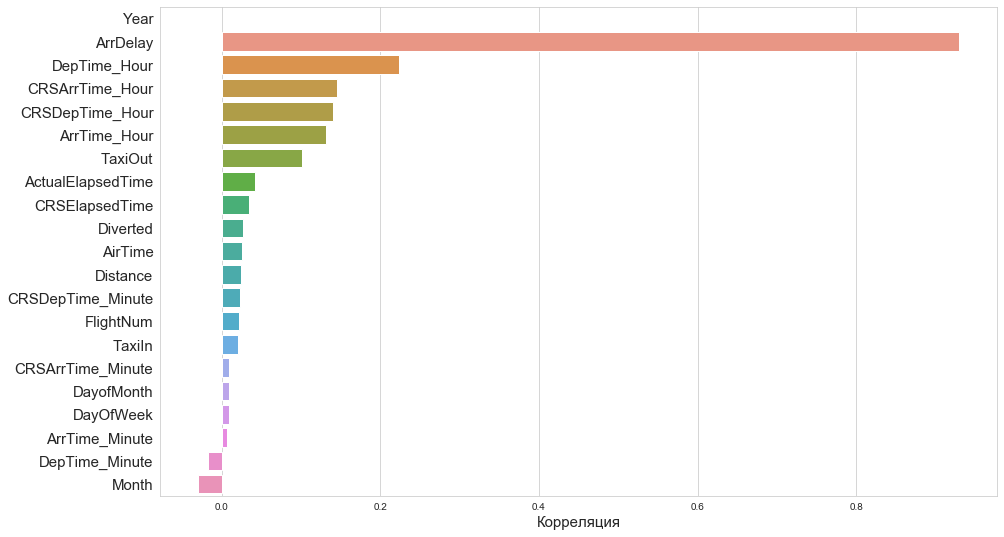

In [52]:
X = X.fillna(numeric_data_mean)

correlations = {
    feature: np.corrcoef(X[feature], y)[0][1]
    for feature in numeric_features
}
sorted_correlations = sorted(correlations.items(), key=lambda x: x[1], reverse=True)
features_order = [x[0] for x in sorted_correlations]
correlations = [x[1] for x in sorted_correlations]

plot = sns.barplot(y = features_order, x = correlations)
sns.set_style('whitegrid')
plot.set_xlabel('Корреляция', fontsize = 15)
plot.set_yticklabels(features_order, fontsize = 15)
plot.figure.set_size_inches(15, 9)

Признак ArrDelay сильно коррелирует, поэтому исключаем его.

In [53]:
X.drop('ArrDelay', axis = 1, inplace = True)

**15. (1 балл)** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

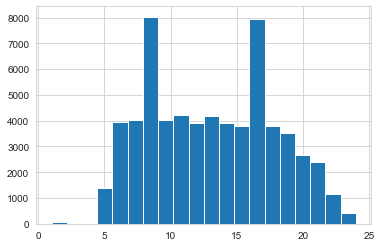

In [54]:
X['DepTime_Hour'].hist(bins=20)

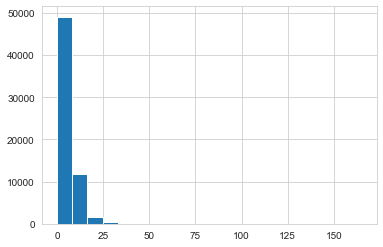

In [55]:
X['TaxiIn'].hist(bins=20)

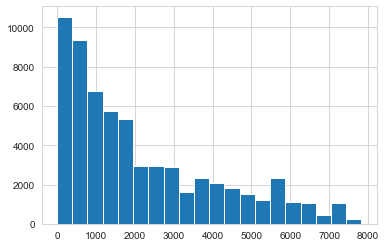

In [56]:
X['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

Масштабирование поможет избежать такого большого отличия в значениях признаков.

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
def transform_data(data):
    # Замена пропущенных значений на нули для вещественных признаков
    numeric_features = data.select_dtypes([np.number]).columns
    data[numeric_features] = data[numeric_features].fillna(0)
    
    # Масштабирование вещественных признаков с помощью StandardScaler
    data[numeric_features] = StandardScaler().fit_transform(data[numeric_features])
    
    # Замена пропущенных значений на строки 'nan' для категориальных признаков
    categorical_features = data.select_dtypes([object]).columns
    data[categorical_features] = data[categorical_features].fillna('nan')
    
    # One-hot-кодирование категориальных признаков с помощью функции pd.get_dummies
    categorical_data = pd.get_dummies(data[categorical_features])
    
    # Метод должен возвращать преобразованный DataFrame, который должна состоять из 
    # масштабированных вещественных признаков и закодированных категориальных
    data = pd.concat([data, categorical_data], axis = 1)
    
    # удаление исходных категориальных признаков
    data.drop(categorical_features, axis = 1, inplace = True)
    
    return data

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [61]:
X_transform = transform_data(X)
X_transform

,Year,Month,DayofMonth,DayOfWeek,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,Distance,TaxiIn,...,Dest_TYR,Dest_TYS,Dest_VLD,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM
0,0.0,-0.118281,0.256485,-0.462767,-0.991600,-0.997818,-0.917095,-0.855859,-0.744130,-0.791728,...,0,0,0,0,0,0,0,0,0,0
1,0.0,-0.118281,-1.332050,-0.462767,0.106546,-0.045399,0.127248,0.060524,0.183961,-0.586761,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.467662,-1.445517,1.541454,-0.207284,0.153613,0.370452,0.311790,0.471018,-0.586761,...,0,0,0,0,0,0,0,0,0,0
3,0.0,-1.583137,0.823819,-0.462767,0.836931,-0.358134,-0.259016,-0.368107,-0.347886,-0.586761,...,0,0,0,0,0,0,0,0,0,0
4,0.0,-0.411252,-1.332050,1.541454,-0.910960,0.295765,0.441982,0.474374,0.634799,-0.586761,...,0,0,0,0,0,0,0,0,0,0
5,0.0,-1.583137,-1.445517,0.038288,-0.687530,0.622715,0.499206,0.725640,0.525612,-0.381795,...,0,0,0,0,0,0,0,0,0,0
6,0.0,-0.997195,1.731554,-1.464878,-0.299738,-0.756159,-0.774035,-0.722836,-0.707147,-0.381795,...,0,0,0,0,0,0,0,0,0,0
7,0.0,-0.704223,0.710352,-0.963823,-0.798988,3.053513,3.460564,2.927915,2.674134,0.438071,...,0,0,0,0,0,0,0,0,0,0
8,0.0,-0.997195,-1.332050,-0.963823,-0.882710,0.665360,0.728103,0.888224,0.603099,-0.586761,...,0,0,0,0,0,0,0,0,0,0
9,0.0,1.053604,-1.105117,-1.464878,-0.977219,1.020740,1.157286,1.080369,1.457225,-0.176828,...,0,0,0,0,0,0,0,0,0,0


**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_transform, y, train_size=0.7, test_size=0.3, random_state=42)

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [66]:
lin_reg = LinearRegression().fit(X_train[0:1000], y_train[0:1000])

In [67]:
y_train_predict = lin_reg.predict(X_train[0:1000])
print('MSE подвыборки:', mean_squared_error(y_train[0:1000], y_train_predict),
      '\nR2 подвыборки:', r2_score(y_train[0:1000], y_train_predict))

MSE подвыборки: 7.328058332735788e-24 
R2 подвыборки: 1.0


In [68]:
y_test_predict = lin_reg.predict(X_test)
print('MSE контрольной выборки:', mean_squared_error(y_test, y_test_predict),
      '\nR2 контрольной выборки:', r2_score(y_test, y_test_predict))

MSE контрольной выборки: 1766.821294757199 
R2 контрольной выборки: -0.3208210274923853


In [69]:
lin_reg.coef_

array([-0.18091185, -0.37491446, -0.3093638 , ...,  0.        ,
        0.        ,  0.        ])

Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

In [70]:
from sklearn.linear_model import Lasso, Ridge

In [71]:
lasso = Lasso().fit(X_train[0:1000], y_train[0:1000])
ridge = Ridge().fit(X_train[0:1000], y_train[0:1000])

Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов).

In [72]:
np.sum(lasso.coef_ == 0)

5733

In [73]:
np.sum(ridge.coef_ == 0)

4492

__18. (1 балл) __ Обучение линейной регрессии.



Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями?

In [75]:
import matplotlib.pyplot as plt

C:\Users\lenovo\python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14059.231965811023, tolerance: 105.98166710000001
  positive)
C:\Users\lenovo\python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20369.665566257063, tolerance: 105.98166710000001
  positive)
C:\Users\lenovo\python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25824.44661385013, tolerance: 105.98166710000001
  positive)
C:\Users\lenovo\python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap:

Text(0.5, 1.0, 'Ridge')

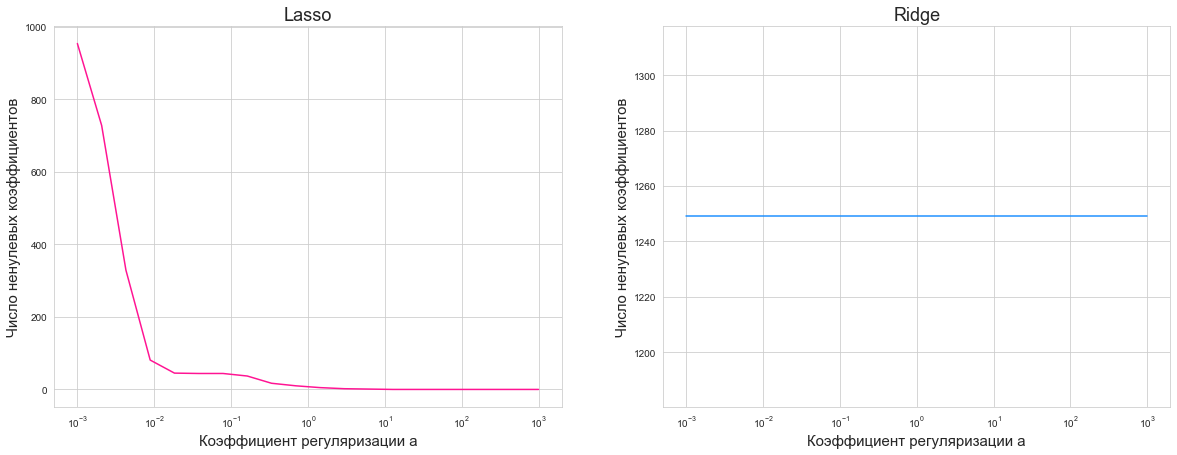

In [76]:
a = np.logspace(-3, 3, 20)
L_a = list()
R_a = list()

for i in range(len(a)):
    Lasso_a = Lasso(a[i]).fit(X_train[0:1000], y_train[0:1000])
    Ridge_a = Ridge(a[i]).fit(X_train[0:1000], y_train[0:1000])
    L_a.append(np.sum(Lasso_a.coef_ != 0))
    R_a.append(np.sum(Ridge_a.coef_ != 0))

fig, ax = plt.subplots(1, 2, figsize = (20, 7))

ax[0].plot(a, L_a, label='Lasso', color='DeepPink')
ax[0].set_xscale('log')
ax[0].set_xlabel('Коэффициент регуляризации a', fontsize=15)
ax[0].set_ylabel('Число ненулевых коэффициентов', fontsize=15)
ax[0].set_title('Lasso', fontsize=18)

ax[1].plot(a, R_a, label='Ridge', color='DodgerBlue')
ax[1].set_xscale('log')
ax[1].set_xlabel('Коэффициент регуляризации a', fontsize=15)
ax[1].set_ylabel('Число ненулевых коэффициентов', fontsize=15)
ax[1].set_title('Ridge', fontsize=18)

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [77]:
from sklearn.metrics import make_scorer

In [78]:
def RMSE(y_true, y_pred):
    
    error = (y_true - y_pred) ** 2
    
    return np.sqrt(np.mean(error))

RMSE_scorer = make_scorer(RMSE, greater_is_better=False)

In [79]:
y_pred = ridge.predict(X_test)
print("RMSE =", RMSE(y_test, y_pred),
      "\nMAE =", mean_absolute_error(y_test, y_pred),
      "\nR2 =", r2_score(y_test, y_pred))

RMSE = 33.91546463764199 
MAE = 16.924036085946813 
R2 = 0.14010209326007672


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах. Для этого воспользуйтесь GridSearchCV и KFold из sklearn. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).

In [80]:
from sklearn.model_selection import GridSearchCV

Best alpha RMSE = 6.1585 
Best alpha MAE = 2.9764 
Best alpha R2 = 6.1585


Text(0, 0.5, 'Функция потерь')

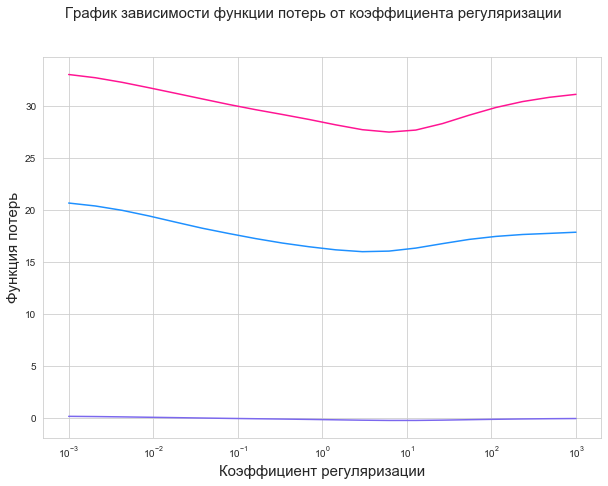

In [82]:
searcher_RMSE = GridSearchCV(Ridge(), [{"alpha": a}], scoring=RMSE_scorer, cv=5).fit(X_train[0:1000], y_train[0:1000])
searcher_MAE = GridSearchCV(Ridge(), [{"alpha": a}], scoring='neg_mean_absolute_error', cv=5).fit(X_train[0:1000], y_train[0:1000])
searcher_R2 = GridSearchCV(Ridge(), [{"alpha": a}], scoring='r2', cv=5).fit(X_train[0:1000], y_train[0:1000])

best_alpha_RMSE = searcher_RMSE.best_params_["alpha"]
best_alpha_MAE = searcher_MAE.best_params_["alpha"]
best_alpha_R2 = searcher_R2.best_params_["alpha"]

print("Best alpha RMSE = %.4f" % best_alpha_RMSE,
      "\nBest alpha MAE = %.4f" % best_alpha_MAE,
      "\nBest alpha R2 = %.4f" % best_alpha_R2)

fig = plt.figure(figsize=(10, 7))
fig.suptitle('График зависимости функции потерь от коэффициента регуляризации', fontsize=15)

plt.plot(a, -searcher_RMSE.cv_results_["mean_test_score"], label='RMSE', color='DeepPink')
plt.plot(a, -searcher_MAE.cv_results_["mean_test_score"], label='MAE', color='DodgerBlue')
plt.plot(a, -searcher_R2.cv_results_["mean_test_score"], label='R2', color='MediumSlateBlue')

plt.xscale('log')
plt.xlabel('Коэффициент регуляризации', fontsize=15)
plt.ylabel('Функция потерь', fontsize=15)

In [83]:
RMSE_R = Ridge(best_alpha_RMSE).fit(X_train[0:1000], y_train[0:1000])
MAE_R = Ridge(best_alpha_MAE).fit(X_train[0:1000], y_train[0:1000])
R2_R = Ridge(best_alpha_R2).fit(X_train[0:1000], y_train[0:1000])

y_pred_RMSE = RMSE_R.predict(X_test)
y_pred_MAE = MAE_R.predict(X_test)
y_pred_R2 = R2_R.predict(X_test)

print("RMSE =", RMSE(y_test, y_pred_RMSE))
print("MAE =", mean_absolute_error(y_test, y_pred_MAE))
print("R2 =", r2_score(y_test, y_pred_R2))

RMSE = 33.136475737520705
MAE = 16.55555848753659
R2 = 0.1791496593700671


__19. (0.5 балла)__ Поиск объектов-выбросов


Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

In [84]:
from sklearn.model_selection import cross_val_predict

C:\Users\lenovo\python3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Text(0.5, 1.0, 'Гистограмма ошибки')

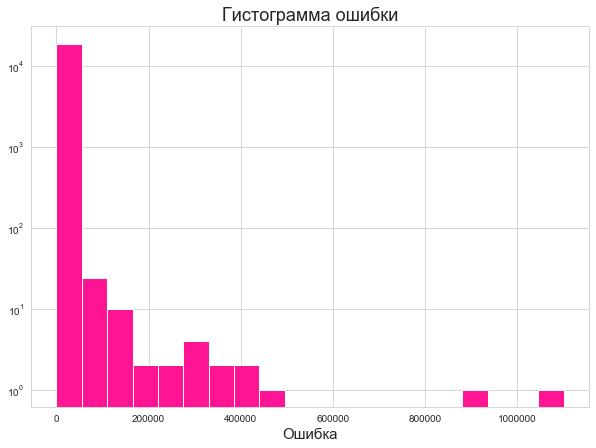

In [85]:
y_pred = cross_val_predict(Ridge(), X_test, y_test)
error = (y_pred - y_test) ** 2

fig, ax = plt.subplots(figsize=(10, 7))

ax.hist(error, bins=20, facecolor = 'DeepPink')
ax.set_xlabel('Ошибка', fontsize=15)
ax.set_yscale('log')
ax.set_title('Гистограмма ошибки', fontsize=18)

Ошибки с небольшими значениями встречаются чаще.